In [1]:
## import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split # function for splitting data to train and test sets

import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
nltk.download('wordnet')


import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

[nltk_data] Downloading package wordnet to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#uploading the data\.
data = pd.read_csv("/Users/Harshini Badam/Desktop/Spotlight_Sentiment Analysis/all_combined.csv")
data.fillna('') 

,reviewId,content,score,app
0,418c7de9-67bc-4b1a-9890-61dcb3d694e3,It is not a security platform on which I can s...,1,Facebook
1,10e9078b-2706-4e2f-9185-2f96da80a112,"There is no freedom of expression, controlling...",1,Facebook
2,468af182-729f-4570-aa1b-89ec505d64a6,Back media and file and link 😡,1,Facebook
3,db1d7793-fe9f-403d-9243-a62e8fcdac3f,It's a good app but bad for school going stude...,3,Facebook
4,d49755ca-3890-42de-b079-99cf87a07bab,Soooo bad,1,Facebook
...,...,...,...,...
199995,c7585b11-4bde-42dd-8b4a-3437f8ef4f89,"It's a great app, but I always face problems i...",4,LINE
199996,3fc1019b-4475-43a7-a006-a3e9b2844a9e,This apps it's so very helpful for me,5,LINE
199997,6b876536-6c2a-46c9-9e32-dada7220fdee,"Too much ADS, UI is changed too much its not a...",1,LINE
199998,571816ba-9287-4af2-9b65-42726ea8a9fa,Ok,5,LINE


# Details of Data

In [3]:
print("shape of the complete dataset:", data.shape)
print("unique apps count", data['app'].nunique())
print("apps available in the dataset", data['app'].unique())

shape of the complete dataset: (200000, 4)
unique apps count 20
apps available in the dataset ['Facebook' 'WhatsApp' 'Facebook Messenger' 'Instagram' 'TikTok'
 'Subway Surfers' 'Facebook Lite' 'Microsoft Word' 'Microsoft PowerPoint'
 'Snapchat' 'SHAREit' 'Netflix' 'Twitter' 'Flipboard' 'Candy Crush Saga'
 'Skype' 'Spotify' 'Dropbox' 'Viber' 'LINE']


# Stratified sample from the dataset

In [4]:
strat_sample=data.groupby('app', group_keys=False).apply(lambda x: x.sample(100))
print("number of unique apps",strat_sample['app'].nunique())
strat_sample

number of unique apps 20


,reviewId,content,score,app
146070,57979204-8f62-413b-8f61-e21b8ddf8675,Fortnite,5,Candy Crush Saga
145181,dad1814f-71d1-4463-a6e3-57e43f427c2b,I am having lots of fun.,5,Candy Crush Saga
146535,08c774a2-7b60-4d27-bff5-3ce6f146686d,"Fun, nerve wrecking game! xD",5,Candy Crush Saga
146257,12370276-7137-462d-ad95-e9e697360d9d,Nice game 🎮🎮🎮,5,Candy Crush Saga
145994,46b42528-9423-4a5a-a214-8ff81cd2aa63,Time pass,5,Candy Crush Saga
...,...,...,...,...
18112,cc26dc27-b909-475a-bb8a-eff3f890102f,Regína noel gracias,5,WhatsApp
14495,3d2d845e-fffe-4fda-a913-0ae24bcb7404,Can you update the profile picture so that oth...,2,WhatsApp
17759,07aee12e-6a4f-4624-bf3c-178e29905e08,Noman shazad 786,2,WhatsApp
13476,78b1feeb-1741-4d59-a605-96c275c87e9b,very very very best,5,WhatsApp


In [5]:
strat_sample = strat_sample.drop_duplicates(subset=['reviewId'])
print(strat_sample['reviewId'].nunique())
print(strat_sample['app'].value_counts())
strat_sample = strat_sample.drop('reviewId',axis=1)
strat_sample.reset_index(drop=True,inplace=True)

2000
app
Candy Crush Saga        100
Dropbox                 100
Viber                   100
Twitter                 100
TikTok                  100
Subway Surfers          100
Spotify                 100
Snapchat                100
Skype                   100
SHAREit                 100
Netflix                 100
Microsoft Word          100
Microsoft PowerPoint    100
LINE                    100
Instagram               100
Flipboard               100
Facebook Messenger      100
Facebook Lite           100
Facebook                100
WhatsApp                100
Name: count, dtype: int64


In [6]:
#decoding the scores to respective sentiments
decode_map = {1: "negative", 2:"negative", 3: "neutral",4: "positive",5: "positive"}
def decode_sentiment(label):
    return decode_map[int(label)]
strat_sample.score = strat_sample.score.apply(lambda x: decode_sentiment(x))
strat_sample

,content,score,app
0,Fortnite,positive,Candy Crush Saga
1,I am having lots of fun.,positive,Candy Crush Saga
2,"Fun, nerve wrecking game! xD",positive,Candy Crush Saga
3,Nice game 🎮🎮🎮,positive,Candy Crush Saga
4,Time pass,positive,Candy Crush Saga
...,...,...,...
1995,Regína noel gracias,positive,WhatsApp
1996,Can you update the profile picture so that oth...,negative,WhatsApp
1997,Noman shazad 786,negative,WhatsApp
1998,very very very best,positive,WhatsApp


In [7]:
#installing language detection
!pip install langdetect
import langdetect
from langdetect import detect

def language_detection(text):

    try:
        language = detect(text)
        return(language)
    except:
        return('error')

strat_sample['language'] = strat_sample['content'].apply(language_detection)
strat_sample = strat_sample[strat_sample['language']=='en']
strat_sample.drop('language', axis=1, inplace=True)

C:\Users\Harshini Badam\AppData\Local\Temp\ipykernel_5452\1129045114.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_sample.drop('language', axis=1, inplace=True)


In [8]:
import re
nltk.download('stopwords')
from nltk.corpus import stopwords

def clean_text(text):

    # Make text lowercase
    text = text.lower()

    # Remove text in square brackets
    text = re.sub('\[.*?\]', '', text)

    # Remove links
    text = re.sub('https?://\S+|www\.\S+', '', text)

    # Remove punctuation
    text = re.sub('[^a-zA-Z0-9\s]+', '', text)

    # Remove words containing numbers
    text = re.sub('\w*\d\w*', '', text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = text.split()

    filtered_words = [word for word in words if word not in stop_words]
    text = ' '.join(filtered_words)

    # Remove extra whitespace
    text = re.sub('\s+', ' ', text).strip()

    return text

strat_sample['content'] = strat_sample['content'].apply(clean_text)

[nltk_data] Downloading package stopwords to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\Harshini Badam\AppData\Local\Temp\ipykernel_5452\1968936382.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_sample['content'] = strat_sample['content'].apply(clean_text)


In [9]:
print(strat_sample)

                                                content     score  \
1                                              lots fun  positive   
2                            fun nerve wrecking game xd  positive   
3                                             nice game  positive   
7                                   nice game time pass  positive   
8                            lovely game yrr attractive  positive   
...                                                 ...       ...   
1988                                 thank whatsapp app  positive   
1991                        valuable asset quality life  positive   
1993                                              heart  positive   
1996  update profile picture others cant take screen...  negative   
1999                                thats hard download  negative   

                   app  
1     Candy Crush Saga  
2     Candy Crush Saga  
3     Candy Crush Saga  
7     Candy Crush Saga  
8     Candy Crush Saga  
...                ..

In [10]:
nltk.download('punkt')
lemma = WordNetLemmatizer()
stop_words = stopwords.words('english')
def text_prep(x):
     corp = str(x).lower() 
     corp = re.sub('[^a-zA-Z]+',' ', corp).strip() 
     tokens = word_tokenize(corp)
     words = [t for t in tokens if t not in stop_words]
     lemmatize = [lemma.lemmatize(w) for w in words]
    
     return lemmatize

# strat_sample['content'] = strat_sample['content'].apply(text_prep)
preprocess_tag = [text_prep(i) for i in strat_sample['content']]
strat_sample["preprocess_txt"] = preprocess_tag
print(strat_sample)
df_method=strat_sample.copy()
df_vader=strat_sample.copy()

[nltk_data] Downloading package punkt to C:\Users\Harshini
[nltk_data]     Badam\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                                content     score  \
1                                              lots fun  positive   
2                            fun nerve wrecking game xd  positive   
3                                             nice game  positive   
7                                   nice game time pass  positive   
8                            lovely game yrr attractive  positive   
...                                                 ...       ...   
1988                                 thank whatsapp app  positive   
1991                        valuable asset quality life  positive   
1993                                              heart  positive   
1996  update profile picture others cant take screen...  negative   
1999                                thats hard download  negative   

                   app                                     preprocess_txt  
1     Candy Crush Saga                                         [lot, fun]  
2     Candy Crush S

C:\Users\Harshini Badam\AppData\Local\Temp\ipykernel_5452\3417783759.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  strat_sample["preprocess_txt"] = preprocess_tag


# Method based on Positive and Negative Words

In [11]:
file = open('negative-words.txt', 'r')
neg_words = file.read().split()
file = open('positive-words.txt', 'r')
pos_words = file.read().split()

In [12]:
positive_words_list = df_method['preprocess_txt'].map(lambda x: [i for i in x if i in pos_words])
df_method['pos_list'] = positive_words_list

negative_words_list = df_method['preprocess_txt'].map(lambda x: [i for i in x if i in neg_words])
df_method['neg_list'] = negative_words_list

df_method['pos_count'] = df_method['pos_list'].apply(len)
df_method['neg_count'] = df_method['neg_list'].apply(len)


df_method['sentiment_score'] = round(df_method['pos_count'] / (df_method['neg_count'] + 1), 2)

for index, row in df_method.iterrows():
    num_positive = row['pos_count']
    num_negative = row['neg_count']                

    if num_positive > num_negative:
        df_method.loc[index, 'sentiment_label'] = "positive"

    elif num_positive < num_negative:
        df_method.loc[index, 'sentiment_label'] = "negative"

    else:
        df_method.loc[index, 'sentiment_label'] = "neutral"

df_method


,content,score,app,preprocess_txt,pos_list,neg_list,pos_count,neg_count,sentiment_score,sentiment_label
1,lots fun,positive,Candy Crush Saga,"[lot, fun]",[fun],[],1,0,1.0,positive
2,fun nerve wrecking game xd,positive,Candy Crush Saga,"[fun, nerve, wrecking, game, xd]",[fun],[],1,0,1.0,positive
3,nice game,positive,Candy Crush Saga,"[nice, game]",[nice],[],1,0,1.0,positive
7,nice game time pass,positive,Candy Crush Saga,"[nice, game, time, pas]",[nice],[],1,0,1.0,positive
8,lovely game yrr attractive,positive,Candy Crush Saga,"[lovely, game, yrr, attractive]","[lovely, attractive]",[],2,0,2.0,positive
...,...,...,...,...,...,...,...,...,...,...
1988,thank whatsapp app,positive,WhatsApp,"[thank, whatsapp, app]",[thank],[],1,0,1.0,positive
1991,valuable asset quality life,positive,WhatsApp,"[valuable, asset, quality, life]",[valuable],[],1,0,1.0,positive
1993,heart,positive,WhatsApp,[heart],[],[],0,0,0.0,neutral
1996,update profile picture others cant take screen...,negative,WhatsApp,"[update, profile, picture, others, cant, take,...",[],[],0,0,0.0,neutral


In [13]:
# data_range=df_new['sentiment'].max()-df_new['sentiment'].min()
print(df_method['neg_list'])


1           []
2           []
3           []
7           []
8           []
         ...  
1988        []
1991        []
1993        []
1996        []
1999    [hard]
Name: neg_list, Length: 1088, dtype: object


# VADER

In [14]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [15]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
SIA = SentimentIntensityAnalyzer()
polarity = [round(SIA.polarity_scores(i)['compound'], 2) for i in df_vader['content']]


df_vader['score_SIA'] = polarity
 
for index, row in df_vader.iterrows():
    row_score=row['score_SIA']
    
    if row_score>=0.05:
        df_vader.loc[index, 'SIA_label'] = "positive"
        
    elif row_score<=-0.05:
        df_vader.loc[index, 'SIA_label'] = "negative"
        
    else:
        df_vader.loc[index, 'SIA_label'] = "neutral"
df_vader

,content,score,app,preprocess_txt,score_SIA,SIA_label
1,lots fun,positive,Candy Crush Saga,"[lot, fun]",0.51,positive
2,fun nerve wrecking game xd,positive,Candy Crush Saga,"[fun, nerve, wrecking, game, xd]",0.80,positive
3,nice game,positive,Candy Crush Saga,"[nice, game]",0.42,positive
7,nice game time pass,positive,Candy Crush Saga,"[nice, game, time, pas]",0.42,positive
8,lovely game yrr attractive,positive,Candy Crush Saga,"[lovely, game, yrr, attractive]",0.77,positive
...,...,...,...,...,...,...
1988,thank whatsapp app,positive,WhatsApp,"[thank, whatsapp, app]",0.36,positive
1991,valuable asset quality life,positive,WhatsApp,"[valuable, asset, quality, life]",0.68,positive
1993,heart,positive,WhatsApp,[heart],0.64,positive
1996,update profile picture others cant take screen...,negative,WhatsApp,"[update, profile, picture, others, cant, take,...",0.00,neutral


In [16]:
df_vader['score'].value_counts()

score
negative    511
positive    504
neutral      73
Name: count, dtype: int64

In [17]:
 # Define a comparison function to compare two values
def compare_values(a, b):
    return a == b

# Apply the comparison function to create a new column 'ComparisonResult'
df_vader['ComparisonResult'] = df_vader.apply(lambda row: compare_values(row['score'].lower(), row['SIA_label'].lower()), axis=1)

mismatched_rows = df_vader[df_vader['ComparisonResult'] == False]
# Calculate the mismatch percentage
mismatch_percentage = (1 - df_vader['ComparisonResult'].mean()) * 100

# print(df_new)
print(f"Mismatch Percentage: {mismatch_percentage:.2f}%")
print(mismatched_rows[['content','score','SIA_label']])
df_vader

Mismatch Percentage: 41.73%
                                                content     score SIA_label
19                                  gives us relazation  positive   neutral
27    good game chat option every third person would...  negative  positive
36                                          nice boring  negative  positive
49                                                 neci  positive   neutral
58                                          update good  negative  positive
...                                                 ...       ...       ...
1961  face issue sharing multiple photos issue multi...  negative  positive
1962                             asleep jesso got loged  positive   neutral
1970                                           whatsapp  negative   neutral
1985  new update trash remove exciting feature repla...  negative  positive
1996  update profile picture others cant take screen...  negative   neutral

[454 rows x 3 columns]


,content,score,app,preprocess_txt,score_SIA,SIA_label,ComparisonResult
1,lots fun,positive,Candy Crush Saga,"[lot, fun]",0.51,positive,True
2,fun nerve wrecking game xd,positive,Candy Crush Saga,"[fun, nerve, wrecking, game, xd]",0.80,positive,True
3,nice game,positive,Candy Crush Saga,"[nice, game]",0.42,positive,True
7,nice game time pass,positive,Candy Crush Saga,"[nice, game, time, pas]",0.42,positive,True
8,lovely game yrr attractive,positive,Candy Crush Saga,"[lovely, game, yrr, attractive]",0.77,positive,True
...,...,...,...,...,...,...,...
1988,thank whatsapp app,positive,WhatsApp,"[thank, whatsapp, app]",0.36,positive,True
1991,valuable asset quality life,positive,WhatsApp,"[valuable, asset, quality, life]",0.68,positive,True
1993,heart,positive,WhatsApp,[heart],0.64,positive,True
1996,update profile picture others cant take screen...,negative,WhatsApp,"[update, profile, picture, others, cant, take,...",0.00,neutral,False


In [18]:
def compare_values(a, b):
    return a == b

# Apply the comparison function to create a new column 'ComparisonResult'
df_vader['ComparisonResult'] = df_vader.apply(lambda row: compare_values(row['score'].lower(), row['SIA_label'].lower()), axis=1)

mismatched_rows = df_vader[df_vader['ComparisonResult'] == False]
# Calculate the mismatch percentage
mismatch_percentage = (1 - df_vader['ComparisonResult'].mean()) * 100

# print(df_new)
print(f"Mismatch Percentage:{ mismatch_percentage:.2f}%")
print(mismatched_rows[['content','score','SIA_label']])



Mismatch Percentage:41.73%
                                                content     score SIA_label
19                                  gives us relazation  positive   neutral
27    good game chat option every third person would...  negative  positive
36                                          nice boring  negative  positive
49                                                 neci  positive   neutral
58                                          update good  negative  positive
...                                                 ...       ...       ...
1961  face issue sharing multiple photos issue multi...  negative  positive
1962                             asleep jesso got loged  positive   neutral
1970                                           whatsapp  negative   neutral
1985  new update trash remove exciting feature repla...  negative  positive
1996  update profile picture others cant take screen...  negative   neutral

[454 rows x 3 columns]


In [19]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(df_vader['score'], df_vader['SIA_label']))

[[207 141 163]
 [ 16  17  40]
 [ 23  71 410]]


# RANDOM FOREST


In [20]:
strat_sample

,content,score,app,preprocess_txt
1,lots fun,positive,Candy Crush Saga,"[lot, fun]"
2,fun nerve wrecking game xd,positive,Candy Crush Saga,"[fun, nerve, wrecking, game, xd]"
3,nice game,positive,Candy Crush Saga,"[nice, game]"
7,nice game time pass,positive,Candy Crush Saga,"[nice, game, time, pas]"
8,lovely game yrr attractive,positive,Candy Crush Saga,"[lovely, game, yrr, attractive]"
...,...,...,...,...
1988,thank whatsapp app,positive,WhatsApp,"[thank, whatsapp, app]"
1991,valuable asset quality life,positive,WhatsApp,"[valuable, asset, quality, life]"
1993,heart,positive,WhatsApp,[heart]
1996,update profile picture others cant take screen...,negative,WhatsApp,"[update, profile, picture, others, cant, take,..."


In [21]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features and labels
X = strat_sample['content']
y = strat_sample['score']

# Vectorize the text data using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_tfidf = tfidf_vectorizer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Obtain feature importance scores
feature_importance = rf_classifier.feature_importances_

# Convert the TF-IDF vector back to original text
X_test_original = tfidf_vectorizer.inverse_transform(X_test)

# Create a DataFrame to display the test data along with the original content, actual, and predicted labels
test_results = pd.DataFrame({
    'Original Content': [' '.join(doc) for doc in X_test_original],  # Convert to plain text
    'Actual Score': y_test,
    'Predicted Score': y_pred
})

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

# Display the DataFrame with the test data, original content, actual labels, and predicted labels
print(test_results)

Accuracy: 0.7614678899082569
Classification Report:
               precision    recall  f1-score   support

    negative       0.75      0.78      0.76        95
     neutral       0.33      0.08      0.12        13
    positive       0.78      0.83      0.81       110

    accuracy                           0.76       218
   macro avg       0.62      0.56      0.56       218
weighted avg       0.74      0.76      0.75       218

                                       Original Content Actual Score  \
679                                           super app      neutral   
111               bemificial greatband extrely app love     positive   
950                                             perfect     positive   
1336  bace anyoneing ai snapchat pls add please game...     positive   
1381                                               nice     negative   
...                                                 ...          ...   
1492                 continuesly worst got app ads time     ne

In [22]:
# Display feature importance
print("Feature Importance:")
feature_names = tfidf_vectorizer.get_feature_names_out()
for feature, importance in zip(feature_names, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
aaa: 7.062430454025997e-06
aajkal: 6.2662285298251e-05
aap: 0.00043975474310954
aata: 0.0
ability: 0.0001252657217652184
able: 0.0005760863674791581
absolutely: 0.000871586581219865
absoutly: 0.0001988290785304986
abused: 4.7678414322634346e-07
abusing: 0.00025133679940822696
academic: 6.511374550540002e-05
acc: 1.0705635084031464e-05
accept: 9.50375192707165e-05
access: 0.0006165144689549079
accessible: 6.8131171064696044e-06
accessing: 0.0
accidentally: 2.3142223216947594e-05
according: 0.0
account: 0.006638956336559645
accounts: 0.0007613992691210225
accuracy: 4.219040177480439e-06
accurate: 8.861629735802798e-05
acha: 0.00018566246967556533
acount: 9.231006996850827e-05
across: 0.0
act: 0.0001767499273019879
acting: 8.509658284312395e-06
action: 0.00032491172769873915
actions: 3.765051784897835e-05
activate: 0.0007450019127971758
activated: 0.0
actual: 0.0
actually: 6.606146910120989e-05
ad: 0.00044103978432696536
adam: 4.178831674179822e-05
add: 0.0007937332121

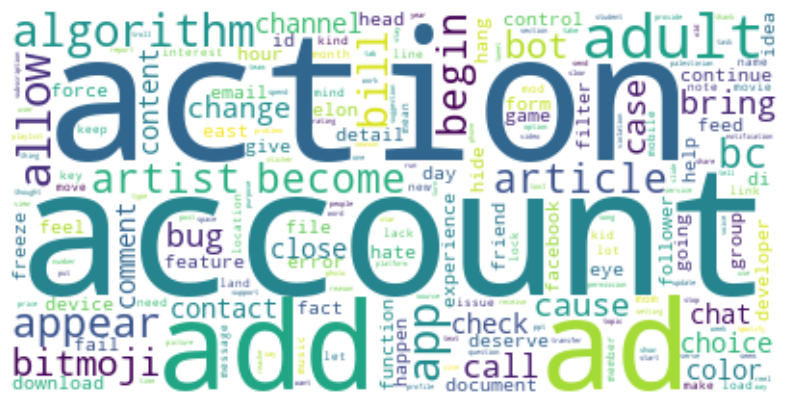

In [23]:
!pip install matplotlib wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string from the list of words
text = ' '.join(feature_names)

# Generate the word cloud

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

# Display the generated Word Cloud

plt.figure(figsize=(10, 5))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis labels
plt.show()
